### Point Mass Model Estimation
The 1-D point mass model depends on the viscous friction parameter. We use an ensamble of models to estimate the best model.

\begin{align}
\dot{x}_0 & = \dot{x_1} \\
\dot{x}_1 & = F - \mu x_1
\end{align}

### Generate Data
First generate the data by running the unit test. The point mass is subject to a sinusoidal force. 

`catkin run_tests mppi_est --no-deps`

In [98]:
# Extract first system evolutions from logs
t = []  # time
x = []  # position 
v = []  # velocity
F = []  # force

with open("../logs/system.txt") as stream:
    for line in stream:
        values = line.split()
        t.append(float(values[0]))
        x.append(float(values[1]))
        v.append(float(values[2]))
        F.append(float(values[3]))

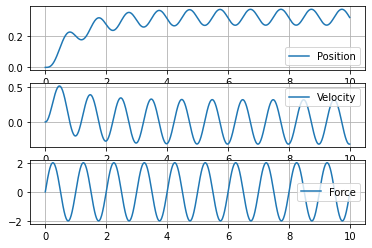

In [99]:
import matplotlib.pyplot as plt

%matplotlib inline
fig, ax = plt.subplots(3, 1)
ax[0].plot(t, x, label="Position")
ax[0].legend()
ax[0].grid()

ax[1].plot(t, v, label="Velocity")
ax[1].legend()
ax[1].grid()

ax[2].plot(t, F, label="Force")
ax[2].legend()
ax[2].grid()


### Posterior
We plot now the posterior as the system evolves with time.

In [102]:
params = []
posteriors = []

with open("../logs/params.txt") as stream:
    values = stream.readline().split()
    params = [float(value) for value in values]
    
with open("../logs/posterior.txt") as stream:
    for line in stream:
        values = line.split()
        posterior = [float(value) for value in values]
        posteriors.append(posterior)

In [103]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(iteration):
    p = posteriors[iteration]
    plt.figure(2)
    plt.bar(params, p)
    plt.show()
    
    map_idx = np.argmax(p)
    print("Cumulative: {}".format(sum(p)))
    print("MAP : {}, p".format(params[map_idx]))

interactive_plot = interactive(f, iteration=(0, len(posteriors)-1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot